<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Hadamard-gate-reached-with-perfect-fidelity-using-3-qubits-+-2-ancillae." data-toc-modified-id="Hadamard-gate-reached-with-perfect-fidelity-using-3-qubits-+-2-ancillae.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Hadamard gate reached with perfect fidelity using 3 qubits + 2 ancillae.</a></span><ul class="toc-item"><li><span><a href="#Failing-to-reach-a-randomly-picked-unitary,-with-two-ancillary-qubits" data-toc-modified-id="Failing-to-reach-a-randomly-picked-unitary,-with-two-ancillary-qubits-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Failing to reach a randomly picked unitary, with two ancillary qubits</a></span></li></ul></li><li><span><a href="#Also-the-Fourier-matrix-is-a-fail" data-toc-modified-id="Also-the-Fourier-matrix-is-a-fail-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Also the Fourier matrix is a fail</a></span></li></ul></div>

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import glob
from IPython.display import display
from IPython.core.debugger import set_trace
from collections import OrderedDict
import itertools
import os
import sys
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sympy
import pandas as pd

# import plotly
# import plotly.plotly as py
# import plotly.graph_objs as go
# plotly.offline.init_notebook_mode(connected=True)
# import cufflinks

import qutip
import theano
import theano.tensor as T

src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

import qubit_network.net_analysis_tools as nat
import qubit_network.utils
from qubit_network.utils import (chop, complex2bigreal, bigreal2complex,
                                 bigreal2qobj, pauli_product, normalize_phase)
from qubit_network.QubitNetwork import pauli_product
from qubit_network.model import QubitNetworkGateModel
from qubit_network.Optimizer import Optimizer
from qubit_network.net_analysis_tools import NetDataFile, NetsDataFolder

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Hadamard gate reached with perfect fidelity using 3 qubits + 2 ancillae.

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


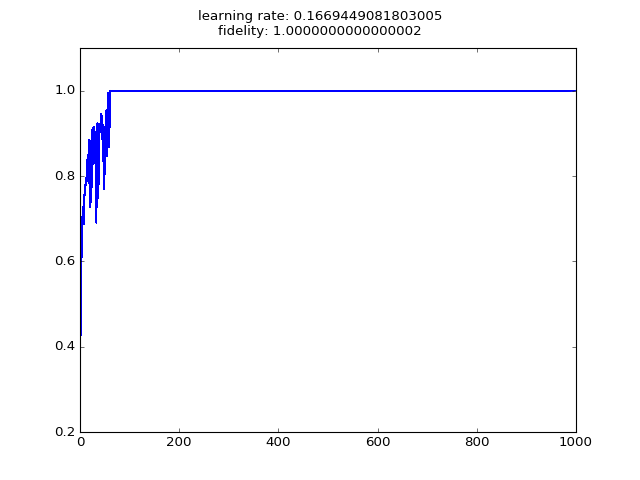

Finished training
Network saved in nets/hadamard5qb.pickle


In [11]:
net = QubitNetwork(
    num_qubits=5,
    interactions='all',
    system_qubits=3
)
sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=2,
    target_gate=qutip.hadamard_transform(3),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.005,
    saveafter_file='nets/hadamard5qb.pickle'
)

In [6]:
qutip.hadamard_transform(5)

Quantum object: dims = [[2, 2, 2, 2, 2], [2, 2, 2, 2, 2]], shape = (32, 32), type = oper, isherm = True
Qobj data =
[[ 0.1767767  0.1767767  0.1767767 ...,  0.1767767  0.1767767  0.1767767]
 [ 0.1767767 -0.1767767  0.1767767 ..., -0.1767767  0.1767767 -0.1767767]
 [ 0.1767767  0.1767767 -0.1767767 ...,  0.1767767 -0.1767767 -0.1767767]
 ..., 
 [ 0.1767767 -0.1767767  0.1767767 ...,  0.1767767 -0.1767767  0.1767767]
 [ 0.1767767  0.1767767 -0.1767767 ..., -0.1767767  0.1767767  0.1767767]
 [ 0.1767767 -0.1767767 -0.1767767 ...,  0.1767767  0.1767767 -0.1767767]]

In [7]:
hadamard_net.target_gate = qutip.hadamard_transform(5)

In [9]:
hadamard_net = qn.load_network_from_file('../data/nets/hadamard5qb.pickle')
hadamard_net.target_gate = qutip.hadamard_transform(3)
hadamard_net.test_fidelity()

array(1.0000000000000002)

In [21]:
hadamard_net.ancillae_state
hadamard_net.num_system_qubits

3

In [23]:
hadamard_net.test_fidelity_without_theano()

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[ 1.]]

<IPython.core.display.Javascript object>


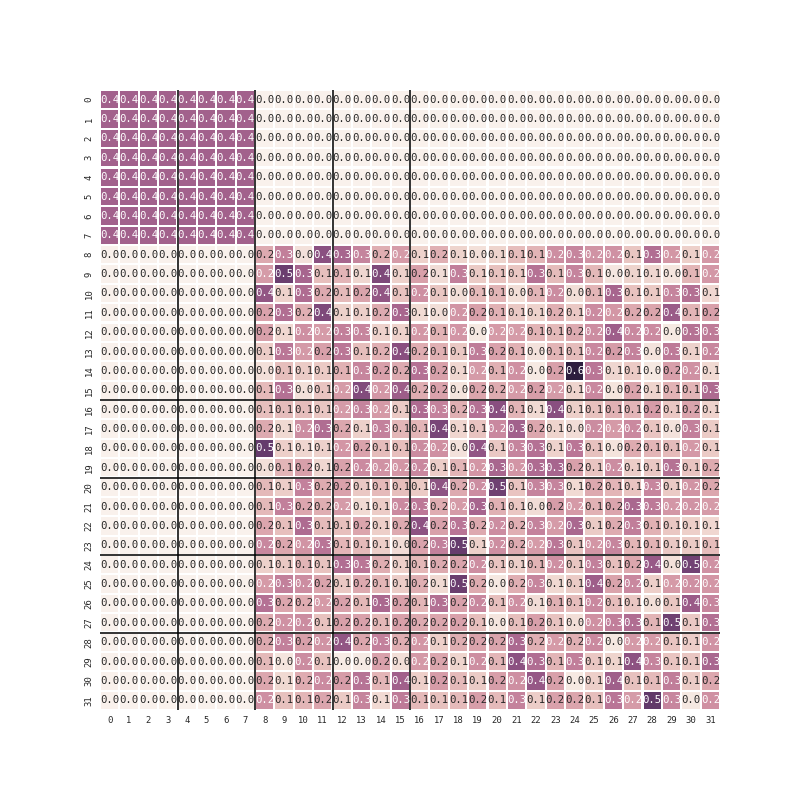

In [18]:
plot_gate(hadamard_net, permutation=[3, 4, 0, 1, 2], fmt='1.1f', hvlines=[4, 8, 12, 16])

In [51]:
net = QubitNetwork.load_network_from_file('nets/hadamard5qb.pickle')
gate = qutip.Qobj(net.get_current_gate(), dims=[[2, 2, 2, 2, 2]] * 2)

p0 = qutip.ket2dm(qutip.basis(2, 0))
p1 = qutip.ket2dm(qutip.basis(2, 1))
pd01 = qutip.Qobj([[0, 1], [0, 0]])
pd10 = qutip.Qobj([[0, 0], [1, 0]])
i3 = qutip.tensor([qutip.qeye(2) for _ in range(3)])
p00 = qutip.tensor(p0, p0)
p01 = qutip.tensor(p0, p1)
p10 = qutip.tensor(p1, p0)
p11 = qutip.tensor(p1, p1)


ntlp = utils.normalize_topleft_phase

extracted00 = chop(ntlp((qutip.tensor(i3, p00) * gate * qutip.tensor(i3, p00)).ptrace([0, 1, 2])))
extracted01 = chop(ntlp((qutip.tensor(i3, p01) * gate * qutip.tensor(i3, p01)).ptrace([0, 1, 2])))
extracted10 = chop(ntlp((qutip.tensor(i3, p10) * gate * qutip.tensor(i3, p10)).ptrace([0, 1, 2])))
extracted11 = chop(ntlp((qutip.tensor(i3, p11) * gate * qutip.tensor(i3, p11)).ptrace([0, 1, 2])))

extracted00

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[ 0.35355339  0.35355339  0.35355339  0.35355339  0.35355339  0.35355339
   0.35355339  0.35355339]
 [ 0.35355339 -0.35355339  0.35355339 -0.35355339  0.35355339 -0.35355339
   0.35355339 -0.35355339]
 [ 0.35355339  0.35355339 -0.35355339 -0.35355339  0.35355339  0.35355339
  -0.35355339 -0.35355339]
 [ 0.35355339 -0.35355339 -0.35355339  0.35355339  0.35355339 -0.35355339
  -0.35355339  0.35355339]
 [ 0.35355339  0.35355339  0.35355339  0.35355339 -0.35355339 -0.35355339
  -0.35355339 -0.35355339]
 [ 0.35355339 -0.35355339  0.35355339 -0.35355339 -0.35355339  0.35355339
  -0.35355339  0.35355339]
 [ 0.35355339  0.35355339 -0.35355339 -0.35355339 -0.35355339 -0.35355339
   0.35355339  0.35355339]
 [ 0.35355339 -0.35355339 -0.35355339  0.35355339 -0.35355339  0.35355339
   0.35355339 -0.35355339]]

In [46]:
qutip.hadamard_transform(3)

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.35355339  0.35355339  0.35355339  0.35355339  0.35355339  0.35355339
   0.35355339  0.35355339]
 [ 0.35355339 -0.35355339  0.35355339 -0.35355339  0.35355339 -0.35355339
   0.35355339 -0.35355339]
 [ 0.35355339  0.35355339 -0.35355339 -0.35355339  0.35355339  0.35355339
  -0.35355339 -0.35355339]
 [ 0.35355339 -0.35355339 -0.35355339  0.35355339  0.35355339 -0.35355339
  -0.35355339  0.35355339]
 [ 0.35355339  0.35355339  0.35355339  0.35355339 -0.35355339 -0.35355339
  -0.35355339 -0.35355339]
 [ 0.35355339 -0.35355339  0.35355339 -0.35355339 -0.35355339  0.35355339
  -0.35355339  0.35355339]
 [ 0.35355339  0.35355339 -0.35355339 -0.35355339 -0.35355339 -0.35355339
   0.35355339  0.35355339]
 [ 0.35355339 -0.35355339 -0.35355339  0.35355339 -0.35355339  0.35355339
   0.35355339 -0.35355339]]

### Failing to reach a randomly picked unitary, with two ancillary qubits

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


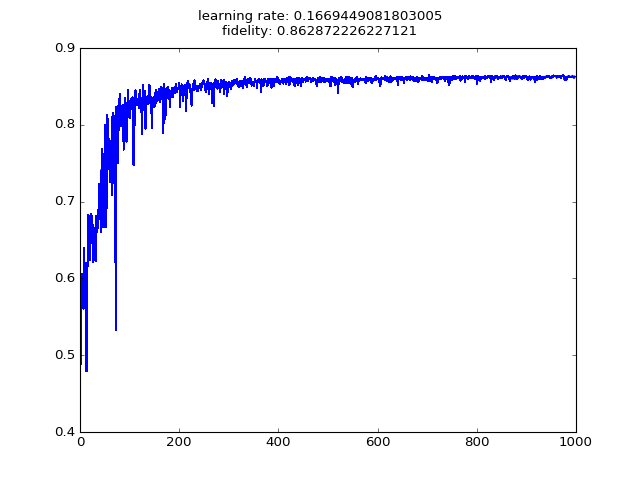

Finished training
Network saved in nets/random5qb.pickle


In [35]:
rand_U = qutip.rand_unitary(8, dims=[[2, 2, 2]] * 2)
net = QubitNetwork.QubitNetwork(
    num_qubits=5,
    interactions='all',
    self_interactions='all',
    system_qubits=3
)
net, _ = QubitNetwork.sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=2,
    target_gate=rand_U,
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.005,
    saveafter_file='nets/random5qb.pickle'
)

## Also the Fourier matrix is a fail

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


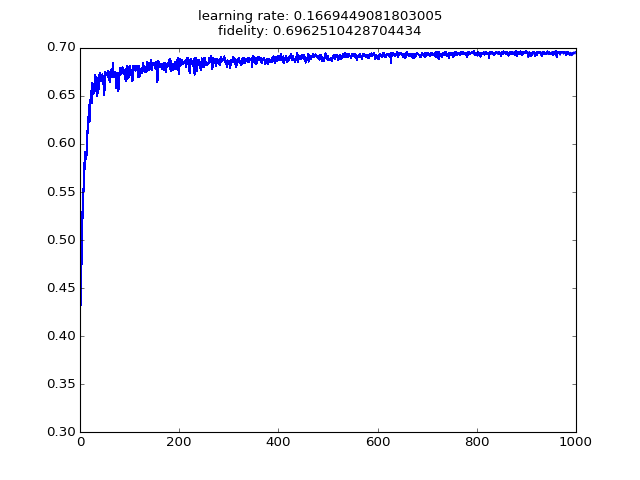

Finished training
Network saved in nets/qft5qb.pickle


In [52]:
import qutip.qip.algorithms.qft
net = QubitNetwork.QubitNetwork(
    num_qubits=5,
    interactions='all',
    self_interactions='all',
    system_qubits=3
)
net, _ = QubitNetwork.sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=2,
    target_gate=qutip.qip.algorithms.qft.qft(3),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.005,
    saveafter_file='nets/qft5qb.pickle'
)

In [76]:
kets = np.asarray([qutip.rand_ket(4).data.toarray() for _ in range(4)]).reshape((4, 4))
kets2 = np.asarray([qutip.rand_ket(4).data.toarray() for _ in range(4)]).reshape((4, 4))
h = qutip.tensor(qutip.sigmaz(), qutip.sigmaz()).data.toarray()



Ukets = np.tensordot(h, kets, axes=[[1], [1]]).T

display(kets)
# kets3 = np.tensordot()
Ukets

array([[-0.20867573+0.48094162j, -0.10788811-0.45968291j,
        -0.24295472+0.44661541j, -0.49346054-0.01434374j],
       [ 0.01740894-0.36087281j, -0.26672928+0.4553151j ,
         0.46540179+0.33317904j, -0.25746569-0.44397716j],
       [-0.53901419-0.32762433j,  0.07191807-0.1538616j ,
        -0.62637233-0.42197362j,  0.03532570-0.04035423j],
       [-0.50250901+0.01044813j,  0.18737892+0.28853923j,
        -0.34883862+0.32651138j,  0.54953861-0.31419584j]])

array([[-0.20867573+0.48094162j,  0.10788811+0.45968291j,
         0.24295472-0.44661541j, -0.49346054-0.01434374j],
       [ 0.01740894-0.36087281j,  0.26672928-0.4553151j ,
        -0.46540179-0.33317904j, -0.25746569-0.44397716j],
       [-0.53901419-0.32762433j, -0.07191807+0.1538616j ,
         0.62637233+0.42197362j,  0.03532570-0.04035423j],
       [-0.50250901+0.01044813j, -0.18737892-0.28853923j,
         0.34883862-0.32651138j,  0.54953861-0.31419584j]])

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


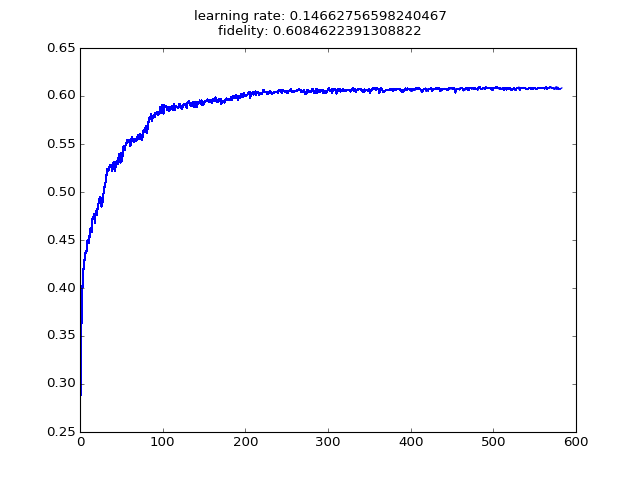

Finished training
Final fidelity: 0.6161851261427038


In [3]:
import qutip.qip.algorithms.qft
net = QubitNetwork(
    num_qubits=6,
    interactions='all',
    system_qubits=3
)
sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=2,
    target_gate=qutip.qip.algorithms.qft.qft(3),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01,
#     saveafter_file='nets/hadamard5qb.pickle'
)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


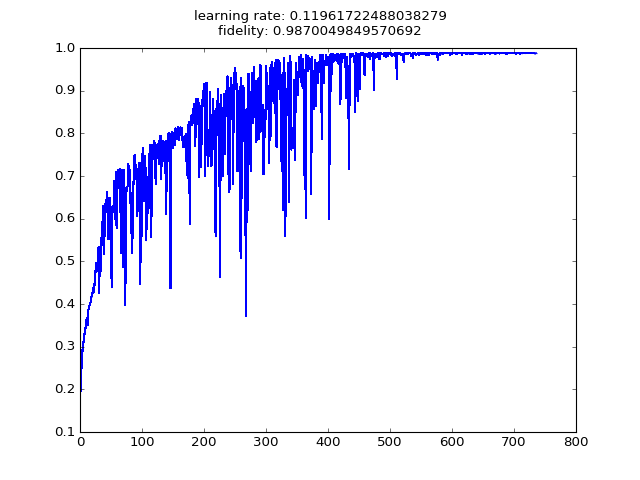

Finished training
Final fidelity: 0.9892115309719247


In [4]:
import qutip.qip.algorithms.qft
net = QubitNetwork(
    num_qubits=8,
    interactions='all',
    system_qubits=3
)
sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=2,
    target_gate=qutip.qip.algorithms.qft.qft(3),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01,
)

In [6]:
# net.save_to_file('nets/qft_3q+5a_all.pickle')

In [12]:
qft_model = NetsDataFolder('../data/nets').filter('qft_3q+5*')[0]
qft_model.get_fidelity(n_samples=100)

0.99370906987360297

Compiling model ... done.


<IPython.core.display.Javascript object>


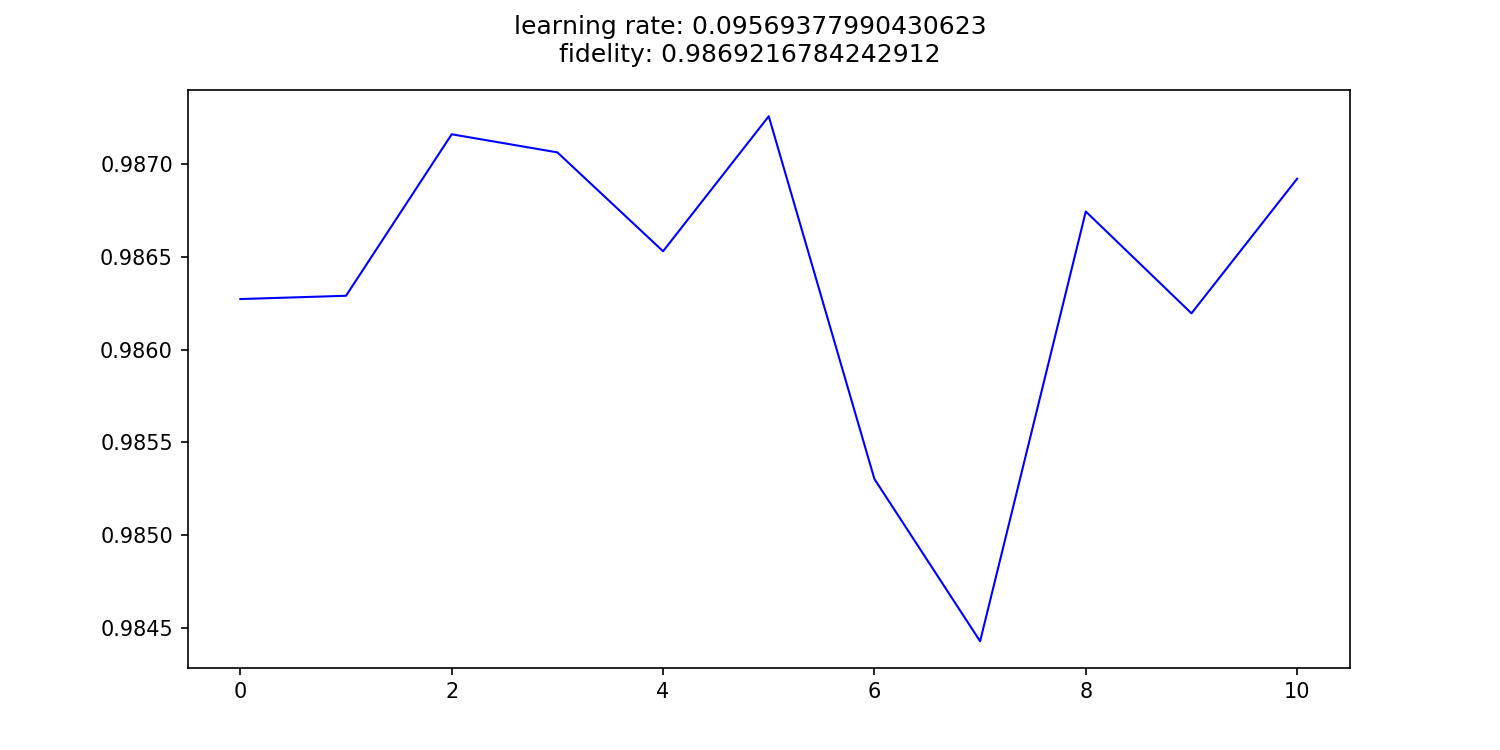

In [11]:
optimizer = Optimizer(
    net=qft_model,
    learning_rate=.1,
    decay_rate=.005,
    n_epochs=500,
    batch_size=2,
    target_gate=qutip.fredkin(),
    training_dataset_size=200,
    test_dataset_size=100,
    sgd_method='momentum'
)
optimizer.run()